#                Project Name-Credit Card  Approval

>               



A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

Continuous Features:
--Annual_income: Annual income of the applicant.

==Birthday_count: Backward count from the current day indicating the applicant's birthday.

--Employed_days: Backward count from the current day indicating the start date of employment.

Discrete Features:

--Ind_ID: Client ID, serving as a unique identifier for each applicant.

--Gender: Gender information (e.g., Male, Female).

--Car_owner: Whether the applicant owns a car (Yes, No).

--Propert_owner: Whether the applicant owns a property (Yes, No).

--Children: Count of children.

--Type_Income: Income type (e.g., Salaried, Self-employed).

--Education: Education level (e.g., High School, Bachelor's, Master's, Doctorate).

--Marital_status: Marital status (e.g., Single, Married, Divorced).

--Housing_type: Living style (e.g., Rent, Own, Family-owned).

--Mobile_phone: Whether the applicant has any mobile phone (Yes, No).

--Work_phone: Whether the applicant has any work phone (Yes, No).

--Phone: Whether the applicant has any phone number (Yes, No).

--EMAIL_ID: Whether the applicant has any email ID (Yes, No).

--Type_Occupation: Occupation of the applicant.

--Family_Members: Family size.

--Label: 0 is application approved and 1 is application rejected.  label column is contionous or discrete




In [1]:
import pandas as pd #Import the pandas Library
import numpy as np #Import the numpy Library
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

**Introduction:**
There are 2 data table,the first one contain information of customer,the second show the record of credit card approval or rejected.

In [3]:
df1 = pd.read_csv('/content/Credit_card.csv') #Load the CSV File 1
df1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [4]:
df2 = pd.read_csv('/content/Credit_card_label.csv') #Load the CSV File 2
df2

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [5]:
credit_card_details = pd.merge(df1, df2, on='Ind_ID') #Merge the DataFrames
credit_card_details

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [6]:
# describe() method in pandas provides various summary statistics for numerical columns in a DataFrame
credit_card_details.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
credit_card_details.shape

(1548, 19)

In [8]:
credit_card_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**Objective:**
To predict whether to approve a credit card to customer.



**Main Challenge:**
The data is highly imbalance,this involves making informed decisions about approving or rejecting credit card applications based on various factors, including application data, annual_income, and internal information not having another financial status of customer like credit bureau scores.

In [9]:
credit_card_details.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [10]:
median = credit_card_details['Annual_income'].median()

print(median)
# Create a new dataset by filling missing values with the mean value
credit_card_details = credit_card_details.fillna({'Annual_income': median})

# Print the filled dataset
print(credit_card_details)

166500.0
       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0       166500.0   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0       166500.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher educa

In [11]:
# Convert the Birthday_count column to its absolute values
credit_card_details['Birthday_count'] = credit_card_details['Birthday_count'].abs()

# Convert Employed_days to absolute values
credit_card_details['Employed_days'] = credit_card_details['Employed_days'].abs()


In [12]:
median = credit_card_details['Birthday_count'].median()
credit_card_details = credit_card_details.fillna({'Birthday_count': median})
print(credit_card_details)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0       166500.0   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0       166500.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

In [13]:
for column in credit_card_details:
    mode_value = credit_card_details[column].mode()[0]
    credit_card_details[column].fillna(mode_value, inplace=True)

In [14]:
credit_card_details.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

**IQR (Interquartile Range) Method:**

To check outliers

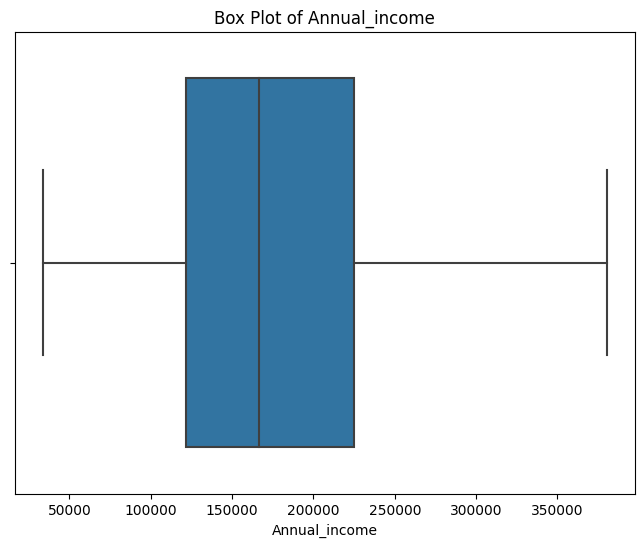

Skewness of Annual_income: 0.80


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Calculate the IQR for the column
Q1 = credit_card_details['Annual_income'].quantile(0.25)
Q3 = credit_card_details['Annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (credit_card_details['Annual_income'] < lower_bound) | (credit_card_details['Annual_income'] > upper_bound)

# Handle outliers by capping them within the defined range
credit_card_details['Annual_income'] = credit_card_details['Annual_income'].clip(lower_bound, upper_bound)


# Visualize the distribution using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_card_details, x='Annual_income')
plt.title(f'Box Plot of Annual_income')
plt.show()

# Calculate skewness of the column
skewness = skew(credit_card_details['Annual_income'])
print(f"Skewness of {'Annual_income'}: {skewness:.2f}")

A skewness value of 0.80 for the "Annual_income" feature indicates that the distribution of income values is positively skewed. This means that the tail of the distribution is extended towards higher values, with a concentration of values on the lower end. Positive skewness suggests that there might be some relatively high-income outliers that are pulling the distribution towards the right.

In [16]:
import numpy as np
import pandas as pd

# Apply log transformation to the column
credit_card_details['Annual_income_log'] = np.log(credit_card_details['Annual_income'])
credit_card_details['Annual_income_log'].skew()

-0.20235804337583702

In [17]:
from scipy.stats import boxcox
# Apply Box-Cox transformation to the column
credit_card_details['Annual_income'],param= boxcox(credit_card_details['Annual_income'])

credit_card_details['Annual_income'].skew()

-0.008048631394531977

The Box-Cox transformation to the "Annual_income" column has resulted in a skewness value of approximately -0.009, which is very close to zero. This is a positive outcome, as it suggests that the transformation has effectively reduced the skewness and brought the data closer to a normal distribution.

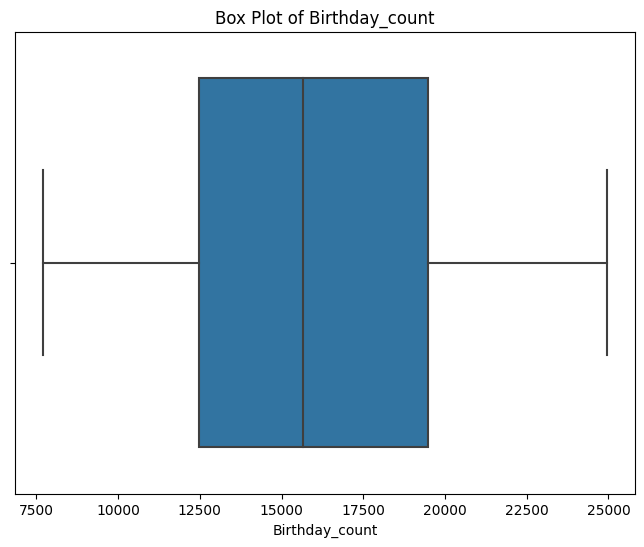

Skewness of Birthday_count: 0.18


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Calculate the IQR for the column
Q1 = credit_card_details['Birthday_count'].quantile(0.25)
Q3 = credit_card_details['Birthday_count'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (credit_card_details['Birthday_count'] < lower_bound) | (credit_card_details['Birthday_count'] > upper_bound)

# Handle outliers by capping them within the defined range
credit_card_details['Birthday_count'] = credit_card_details['Birthday_count'].clip(lower_bound, upper_bound)


# Visualize the distribution using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_card_details, x='Birthday_count')
plt.title(f'Box Plot of Birthday_count')
plt.show()

# Calculate skewness of the column
skewness = skew(credit_card_details['Birthday_count'])
print(f"Skewness of {'Birthday_count'}: {skewness:.2f}")


A skewness value of 0.18 for the "Birthday_count"  indicates that the distribution of the backward count from the current day to the applicant's birthday is slightly positively skewed. However, a skewness value of 0.18 is relatively close to zero, that  means the skewness is not very pronounced.

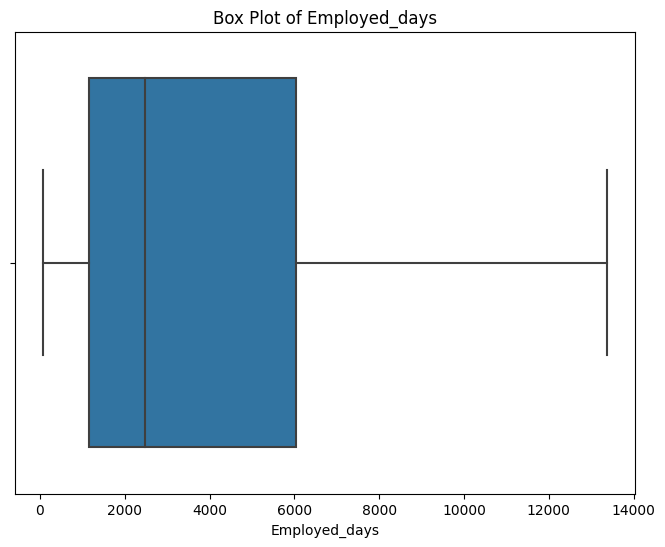

Skewness of Employed_days: 1.13


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Calculate the IQR for the column
Q1 = credit_card_details['Employed_days'].quantile(0.25)
Q3 = credit_card_details['Employed_days'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (credit_card_details['Employed_days'] < lower_bound) | (credit_card_details['Employed_days'] > upper_bound)

# Handle outliers by capping them within the defined range
credit_card_details['Employed_days'] = credit_card_details['Employed_days'].clip(lower_bound, upper_bound)


# Visualize the distribution using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_card_details, x='Employed_days')
plt.title(f'Box Plot of Employed_days')
plt.show()

# Calculate skewness of the column
skewness = skew(credit_card_details['Employed_days'])
print(f"Skewness of {'Employed_days'}: {skewness:.2f}")

A skewness value of 1.13 for the "Employed_days" feature indicates that the distribution of backward count from the current day to the applicant's employment start date is positively skewed. Positive skewness means that the tail of the distribution is extended towards higher values, while the majority of values are concentrated on the lower end.

In [20]:
# Apply reciprocal transformation to the column
credit_card_details['Employed_days'] = 1 / credit_card_details['Employed_days']

# Calculate skewness of the reciprocal transformed column
skewness = skew(credit_card_details['Employed_days'])
print(f"Skewness of Reciprocal Transformed Employed_days: {skewness:.2f}")


Skewness of Reciprocal Transformed Employed_days: 3.93


In [21]:
from scipy.stats import boxcox
# Apply Box-Cox transformation to the column
credit_card_details['Employed_days'] = boxcox(credit_card_details['Employed_days'], 0.15)



# Calculate skewness of the Box-Cox transformed column
skewness = skew(credit_card_details['Employed_days'])
print(f"Skewness of Box-Cox Transformed {'Employed_days'}: {skewness:.2f}")

Skewness of Box-Cox Transformed Employed_days: 0.82


A skewness value of around 0.72  it aligns with the natural distribution of the data and doesn't significantly impact the analysis results.

**Basic EDA steps:**



Distribution Visualizations of Annual Income

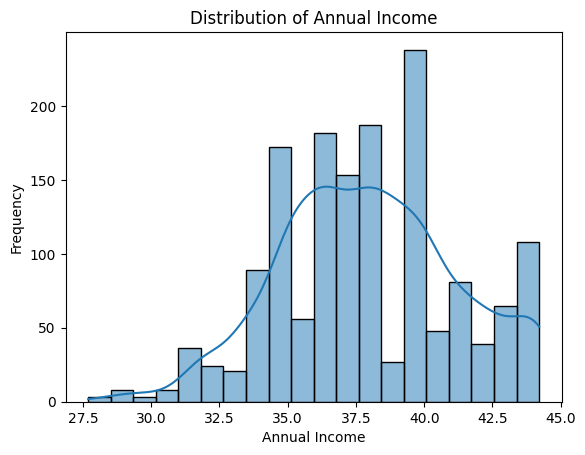

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
sns.histplot(credit_card_details["Annual_income"], bins=20, kde=True)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()


Distribution of Application status

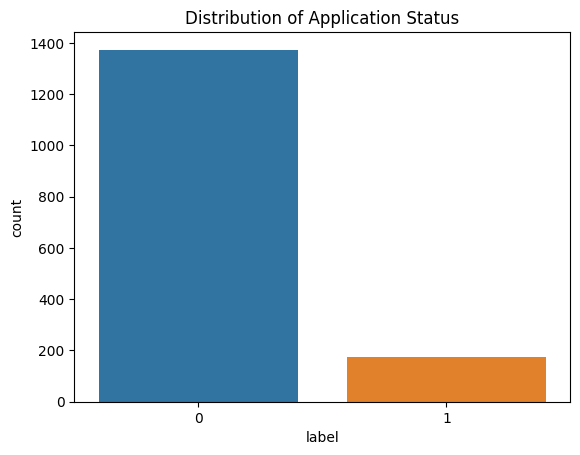

In [23]:
import seaborn as sns
# Explore the distribution of the target variable (Label)
sns.countplot(x='label', data=credit_card_details)
plt.title('Distribution of Application Status')
plt.show()

**Analyze the distributions, correlations, and trends in the data**

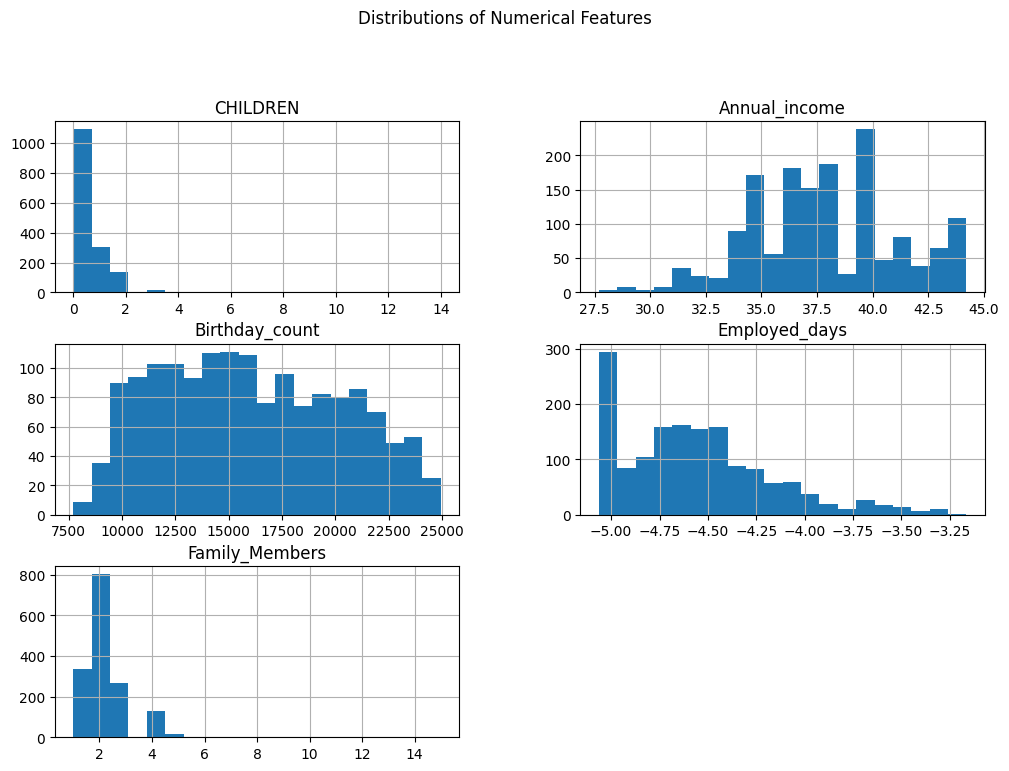

In [24]:
# Analyze distributions of numerical features
numerical_features = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']
credit_card_details[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distributions of Numerical Features', y=1.02)
plt.show()


The above distribution shows different types of distributions (normal, skewed, bimodal) can provide insights into the data characteristics and might suggest appropriate transformation strategies if needed.

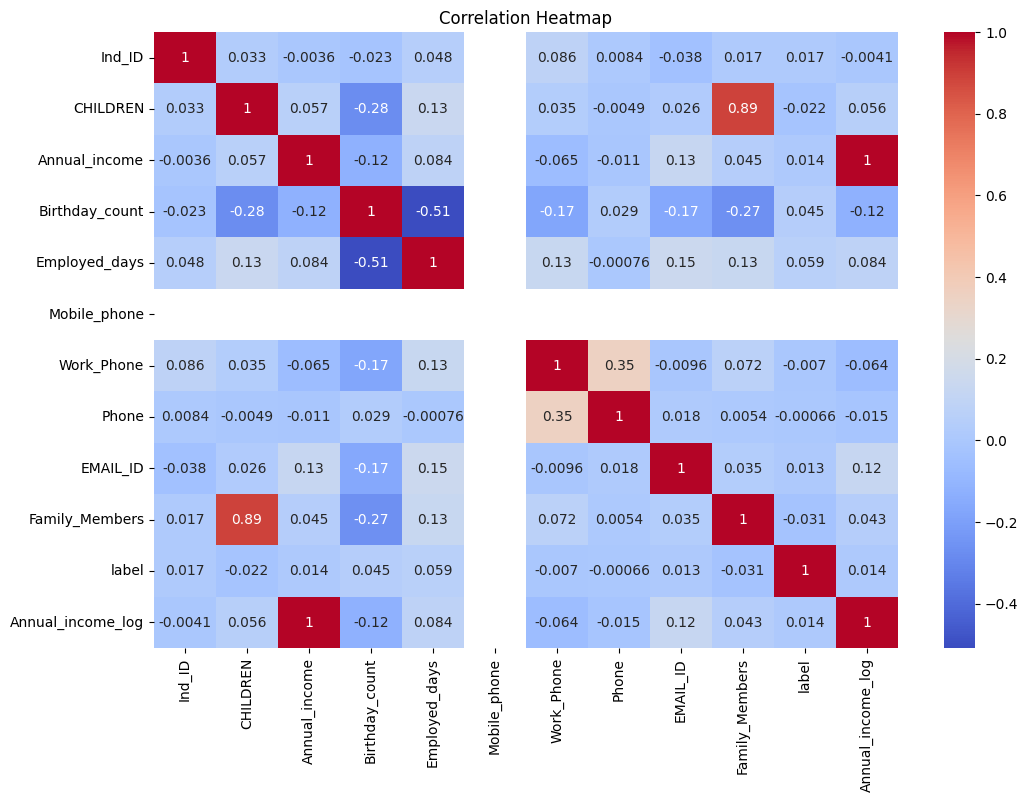

In [25]:
# Analyze correlations using a heatmap
correlation_matrix = credit_card_details.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


-- +1 indicates a perfect positive correlation (as one variable increases, the other also increases proportionally).

---1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).

--0 indicates no linear correlation between the variables.

categorical features using count plots

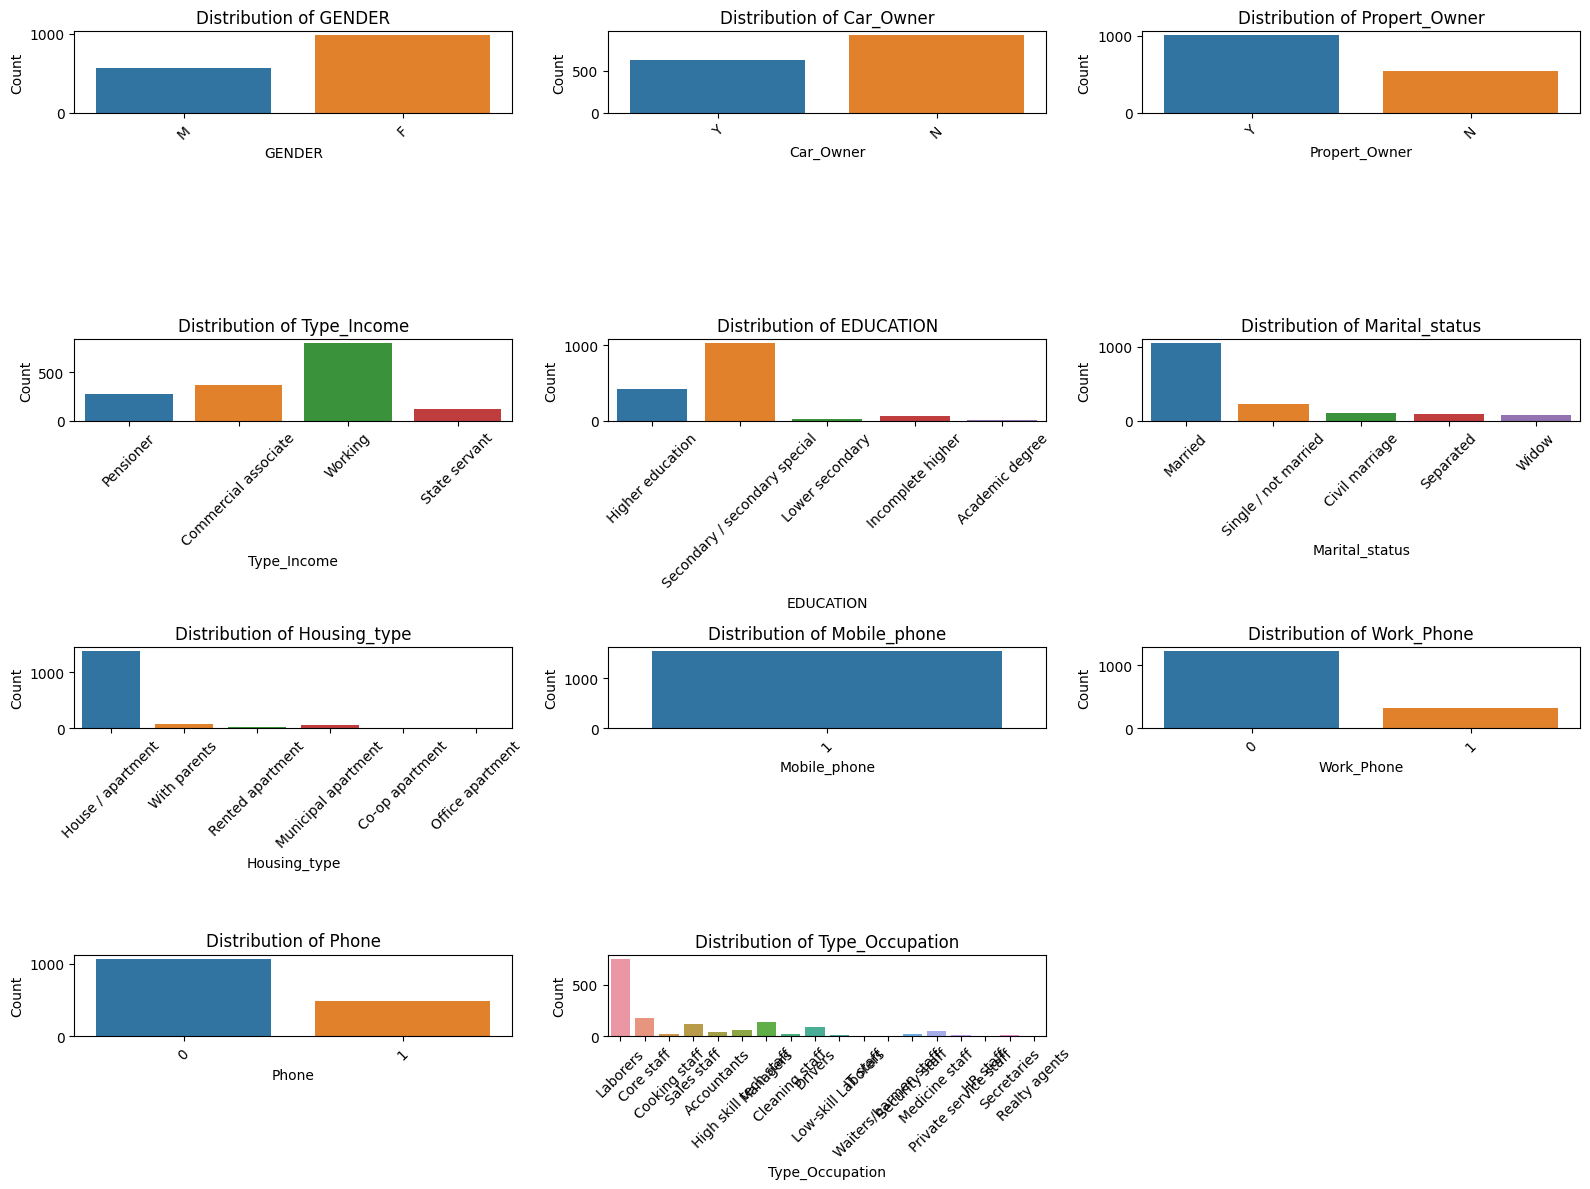

In [26]:
# Explore categorical features using count plots
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, data=credit_card_details)
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**Feature Relationships:**

Relationship between Annual_income and Employed_days

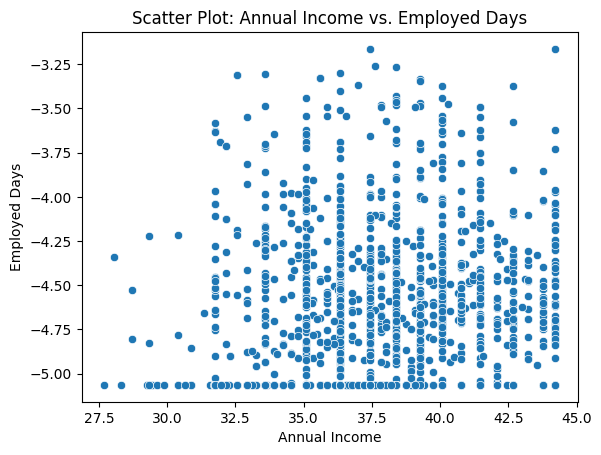

In [27]:
# Scatter plot between Annual_income and Employed_days
sns.scatterplot(x=credit_card_details["Annual_income"], y=credit_card_details["Employed_days"])
plt.xlabel("Annual Income")
plt.ylabel("Employed Days")
plt.title("Scatter Plot: Annual Income vs. Employed Days")
plt.show()


**Categorical Feature Analysis:**

Relationship between Annual_income and Gender

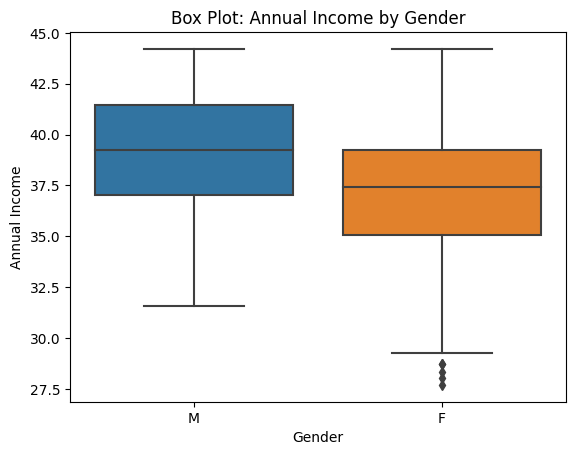

In [28]:
sns.boxplot(x="GENDER", y="Annual_income", data=credit_card_details)
plt.xlabel("Gender")
plt.ylabel("Annual Income")
plt.title("Box Plot: Annual Income by Gender")
plt.show()

**Correlation with Target:**

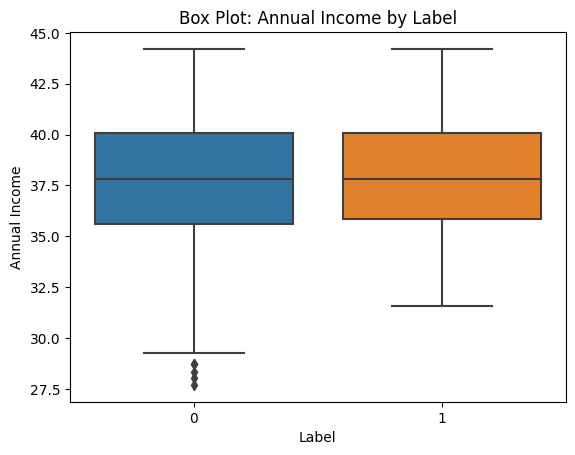

In [29]:
sns.boxplot(x="label", y="Annual_income", data=credit_card_details)
plt.xlabel("Label")
plt.ylabel("Annual Income")
plt.title("Box Plot: Annual Income by Label")
plt.show()


**Multi-Dimensional Analysis:**

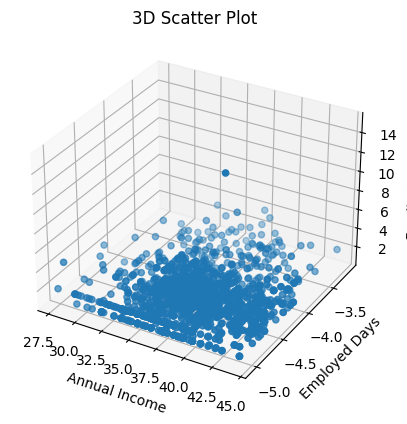

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(credit_card_details["Annual_income"], credit_card_details["Employed_days"], credit_card_details["Family_Members"])
ax.set_xlabel("Annual Income")
ax.set_ylabel("Employed Days")
ax.set_zlabel("Family Members")
plt.title("3D Scatter Plot")
plt.show()


Calculate the Ratio of Income to Family Size

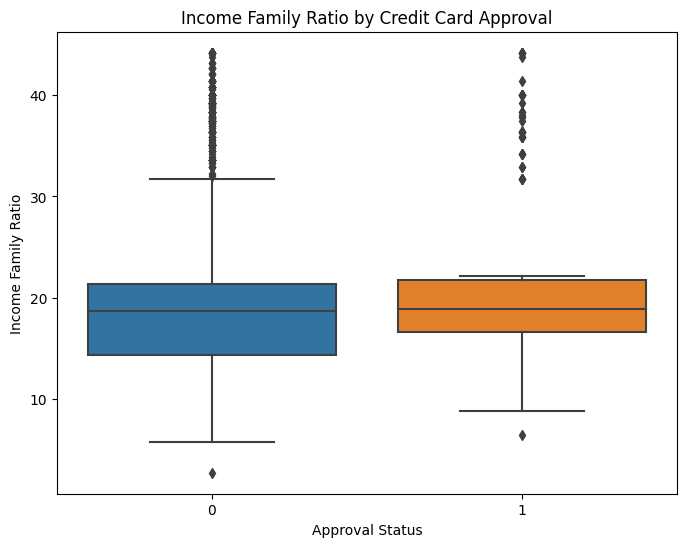

In [31]:


# Calculate the ratio of income to family size
credit_card_details['Income_Family_Ratio'] = credit_card_details['Annual_income'] / credit_card_details['Family_Members']


import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to show the distribution of the ratio by credit card approval
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Income_Family_Ratio', data=credit_card_details)
plt.title('Income Family Ratio by Credit Card Approval')
plt.xlabel('Approval Status')

plt.ylabel('Income Family Ratio')
plt.show()


In [32]:
# Apply One-Hot Encoding to all categorical variables
df= pd.get_dummies(credit_card_details, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'], drop_first=True)
df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,38.392378,18772.0,-5.063412,1,0,0,0,2,...,1,0,0,0,0,0,0,0,0,0
1,5009744,0,42.678668,13557.0,-4.103811,1,1,1,0,2,...,1,0,0,0,0,0,0,0,0,0
2,5009746,0,42.678668,15661.5,-4.103811,1,1,1,0,2,...,1,0,0,0,0,0,0,0,0,0
3,5009749,0,37.825932,13557.0,-4.103811,1,1,1,0,2,...,1,0,0,0,0,0,0,0,0,0
4,5009752,0,42.678668,13557.0,-4.103811,1,1,1,0,2,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,37.825932,11957.0,-4.562498,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,40.054390,10229.0,-4.367636,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,38.392378,13174.0,-4.602143,1,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
1546,5118219,0,41.458354,15292.0,-4.140426,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.preprocessing import StandardScaler

# Features to be scaled
features_to_scale = ['Annual_income', 'CHILDREN', 'Birthday_count', 'Employed_days', 'Family_Members','Income_Family_Ratio']

# Calculate the median of the selected features
medians = df[features_to_scale].median()

# Initialize the scaler with median scaling
scaler = StandardScaler(with_mean=False)

# Apply Standardization to selected features using median scaling
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])




In [41]:
df.shape

(1548, 49)

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(["Ind_ID","label"], axis=1)  # Features
y = df["label"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income_log,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
680,0.000000,12.018054,5.032151,-12.770069,1,0,0,0,1.055447,12.218495,...,1,0,0,0,0,0,0,0,0,0
1079,2.575858,11.456223,3.329757,-11.267384,1,0,0,0,3.166342,11.967181,...,1,0,0,0,0,0,0,0,0,0
1190,1.287929,13.533088,4.040299,-9.986685,1,0,1,1,3.166342,12.848584,...,1,0,0,0,0,0,0,0,0,0
864,0.000000,11.751850,4.901381,-12.770069,1,0,0,0,1.055447,12.100712,...,1,0,0,0,0,0,0,0,0,0
743,0.000000,11.122921,3.730523,-10.442270,1,1,0,0,2.110895,11.813030,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.000000,13.063878,3.855934,-9.698685,1,1,1,1,2.110895,12.660328,...,0,0,0,0,0,0,1,0,0,0
1294,1.287929,12.018054,2.433898,-9.712398,1,1,0,0,3.166342,12.218495,...,1,0,0,0,0,0,0,0,0,0
860,2.575858,10.739458,3.119191,-9.311303,1,0,1,0,4.221790,11.630709,...,1,0,0,0,0,0,0,0,0,0
1459,0.000000,11.637523,4.370440,-11.940606,1,0,0,0,2.110895,12.049419,...,0,0,0,0,0,0,0,0,0,0


Accuracy: 0.8935483870967742
Confusion Matrix:
 [[277   3]
 [ 30   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       280
           1       0.00      0.00      0.00        30

    accuracy                           0.89       310
   macro avg       0.45      0.49      0.47       310
weighted avg       0.81      0.89      0.85       310



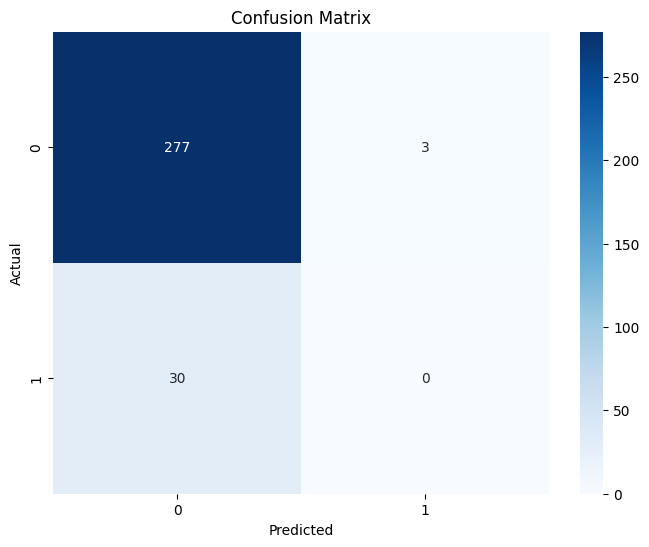

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Display a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



From the results, it's clear that the model performs well in predicting the "approved" class Label 0 with high precision and recall. However, its performance on the "rejected" class Label 1 is poor, with very low precision, recall, and F1-score. This suggests that the model struggles to identify rejected applications correctly.

Accuracy (Decision Tree): 0.90
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       280
           1       0.50      0.47      0.48        30

    accuracy                           0.90       310
   macro avg       0.72      0.71      0.71       310
weighted avg       0.90      0.90      0.90       310



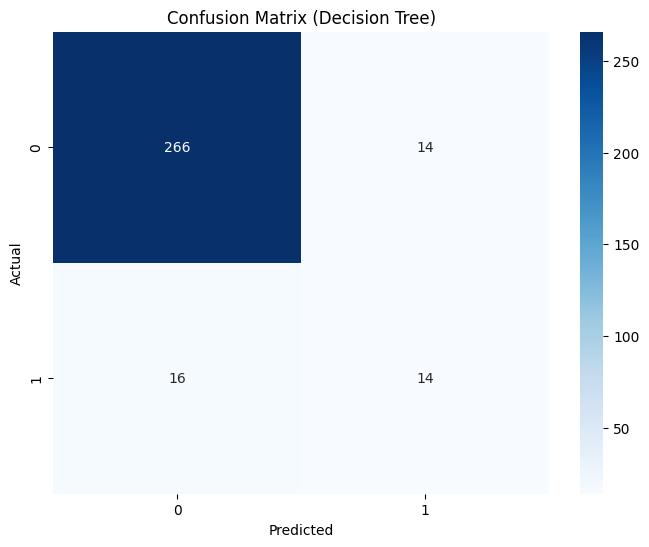

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)


print(f"Accuracy (Decision Tree): {accuracy_decision_tree:.2f}")
print("Classification Report (Decision Tree):\n", classification_report_decision_tree)

# Display a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()


Compared to the Logistic Regression model, the Decision Tree model shows improvement in predicting both approved and rejected applications. It has better precision, recall, and F1-score for the "rejected" class Label 1. This suggests that the Decision Tree model is better at identifying rejected applications correctly.

Accuracy (Random Forest): 0.93
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       280
           1       1.00      0.30      0.46        30

    accuracy                           0.93       310
   macro avg       0.97      0.65      0.71       310
weighted avg       0.94      0.93      0.92       310



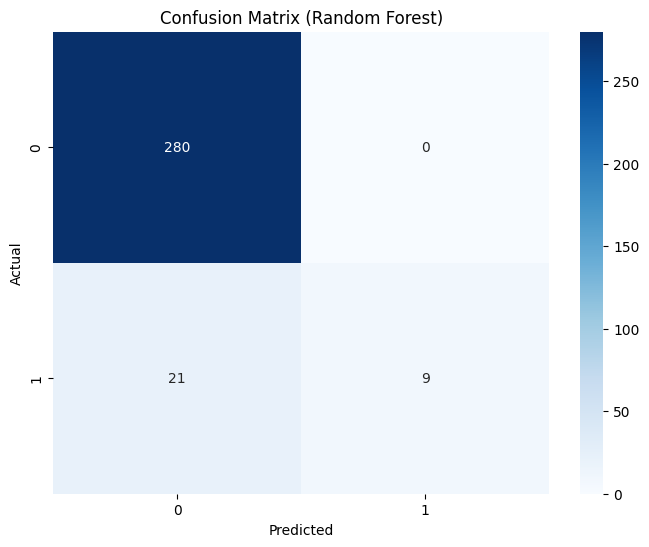

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print(f"Accuracy (Random Forest): {accuracy_random_forest:.2f}")
print("Classification Report (Random Forest):\n", classification_report_random_forest)

# Display a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()







Compared to both the Logistic Regression and Decision Tree models, the Random Forest model shows improved performance in predicting both approved and rejected applications. It has high precision and recall for the "rejected" class label 1, indicating that it can correctly identify a significant portion of rejected applications. The higher accuracy and F1-score for the "rejected" class further reinforce the model's capability.

Accuracy (Gradient Boosting): 0.92
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       280
           1       1.00      0.13      0.24        30

    accuracy                           0.92       310
   macro avg       0.96      0.57      0.60       310
weighted avg       0.92      0.92      0.89       310



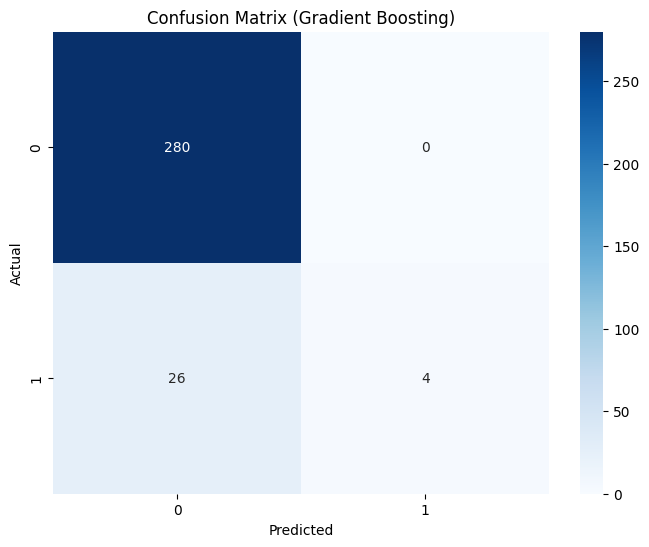

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
classification_report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)


print(f"Accuracy (Gradient Boosting): {accuracy_gradient_boosting:.2f}")
print("Classification Report (Gradient Boosting):\n", classification_report_gradient_boosting)

# Display a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gradient_boosting, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()


The Gradient Boosting model shows high precision and recall for the "approved" class label 0, indicating its effectiveness in identifying approved applications. However, its performance on the "rejected" class label 1 is relatively poor, with low recall and F1-score. This suggests that the model struggles to correctly identify rejected applications.

**When comparing the four models (Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting), the Random Forest model seems to offer the best balance between overall accuracy, precision, and recall for both classes. However, the choice of the best model also depends on other factors such as interpretability, computational efficiency, and potential deployment requirements.**